In [45]:
# Make a better system naming things, with doucmentation
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
notebook_dir = os.path.abspath(os.getcwd())
src_path = os.path.join('/home/lerceg/LukaPosao/market_models/', 'src')
sys.path.append(src_path)

import market_models.src.models.predict_model as pm
import market_models.src.models.train_model as tm
import market_models.src.utils as utils

In [46]:
service = 'netrisk_casco'
dates = '2023_11_14__2023_11_20__2023_12_12__2023_12_22__2023_12_28__2023_12_29__2024_01_02'.split('__')
cur = ''
dates_pref = []

for i in range(1, len(dates)):
    dates_pref.append("__".join(dates[ : i + 1]))


In [47]:
dates_pref

['2023_11_14__2023_11_20',
 '2023_11_14__2023_11_20__2023_12_12',
 '2023_11_14__2023_11_20__2023_12_12__2023_12_22',
 '2023_11_14__2023_11_20__2023_12_12__2023_12_22__2023_12_28',
 '2023_11_14__2023_11_20__2023_12_12__2023_12_22__2023_12_28__2023_12_29',
 '2023_11_14__2023_11_20__2023_12_12__2023_12_22__2023_12_28__2023_12_29__2024_01_02']

In [42]:
service = 'netrisk_casco'
data_name_benchmark = 'netrisk_casco_benchmark'
target_variable = 'KÖBE_price'


data_names = [f'{service}_{date}' for date in dates_pref]
model_names = [utils.get_model_name(data_name, target_variable) for data_name in data_names]

data_path_benchmark = utils.get_processed_data_path(data_name_benchmark)
features_path_benchmark = utils.get_features_path(data_name_benchmark)
model_paths = [utils.get_model_path(model_name) for model_name in model_names]


data_benchmark, features = utils.load_data(data_path_benchmark, features_path_benchmark, target_variable)

models = [None] * len(model_paths)
for i in range(len(model_paths)):
    model = None
    try:
        model = utils.load_model(model_paths[i])
    except Exception as e:
        data, features = utils.load_data(utils.get_processed_data_path(data_names[i]), utils.get_features_path(data_names[i]), target_variable)
        tm.train_model_util(data, features, target_variable, is_classification = False)
        model = utils.load_model(model_paths[i])
    models[i] = model
        
models = [utils.load_model(model_path) for model_path in model_paths]

predictions = [utils.predict(model, data_benchmark[features]) for model in models]

errors = [mean_absolute_error(prediction, data_benchmark[target_variable]) for prediction in predictions]

target_error = data_benchmark[target_variable].mean() * 0.03

  DateCrawled  isRecent  CarMake  CarAge  ccm  kw    kg  car_value  \
0  2023_12_31      True       20       2  998  70  1160    13572.0   
1  2023_12_31      True       20       2  998  70  1160    13572.0   
2  2023_12_31      True       20       2  998  70  1160    13572.0   
3  2023_12_31      True       23       4  998  49   999    12477.4   
4  2023_12_31      True       23       4  998  49   999    12477.4   

   CarMakerCategory  PostalCode  PostalCode2  PostalCode3  Category  \
0              1.00        7391           73          739         2   
1              1.00        7391           73          739         2   
2              1.00        7391           73          739         2   
3              0.97        7391           73          739         2   
4              0.97        7391           73          739         2   

   Longitude  Latitude  Age  LicenseAge  BonusMalus  BonusMalusCode  \
0    18.0809   46.1993   52          18         0.0               1   
1    18.06

In [44]:
data

,DateCrawled,isRecent,CarMake,CarAge,ccm,kw,kg,car_value,CarMakerCategory,PostalCode,PostalCode2,PostalCode3,Category,Longitude,Latitude,Age,LicenseAge,BonusMalus,BonusMalusCode,GROUPAMA_price
0,2023_11_14,True,28,2,998,49,899,15337.400,1.00,1016,10,101,2,19.0404,47.4984,39,18,1.0,2,102780.0
1,2023_11_14,True,20,1,999,92,1280,24388.000,1.00,1016,10,101,2,19.0404,47.4984,48,18,0.0,1,142080.0
2,2023_11_14,True,12,2,999,54,974,6757.400,0.97,1016,10,101,2,19.0404,47.4984,26,18,0.0,1,109356.0
3,2023_11_14,True,23,2,998,49,996,8447.400,0.97,1016,10,101,2,19.0404,47.4984,56,18,7.0,8,178620.0
4,2023_11_14,True,58,2,999,59,1270,11568.336,1.00,1016,10,101,2,19.0404,47.4984,42,18,7.0,8,134844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2023_11_20,True,28,6,1591,99,1444,16533.400,1.00,2524,25,252,4,18.5984,47.6851,38,18,10.0,11,245808.0
2057,2023_11_20,True,5,7,1499,80,1300,14339.000,1.00,2363,23,236,2,19.2370,47.3433,24,18,0.0,1,208704.0
2058,2023_11_20,True,21,3,1318,75,1073,11619.400,1.00,3646,36,364,7,20.4333,48.1667,36,18,0.0,1,158736.0
2059,2023_11_20,True,56,4,999,59,1100,11545.222,1.00,6724,67,672,7,20.1482,46.2530,43,18,0.0,1,105864.0


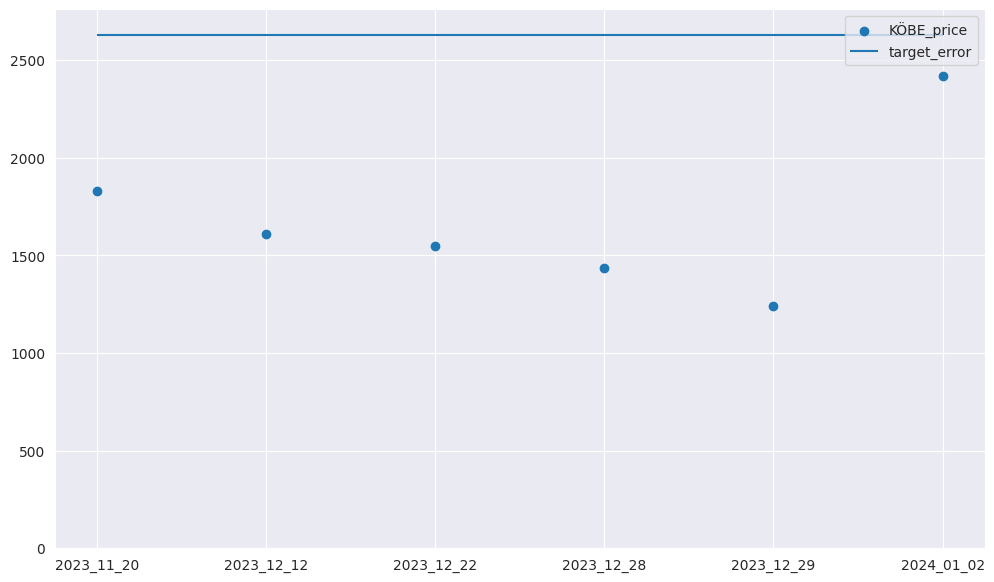

In [43]:
plt.figure(figsize = (12, 7))
plt.scatter(dates[1 :], errors, label = target_variable)
top = max(target_error, max(errors))  * 1.05
plt.ylim(bottom = 0, top = top)
plt.hlines(y = data_benchmark[target_variable].mean() * 0.03, xmin = dates[1], xmax = dates[-1], label = 'target_error')
plt.legend()
plt.show()

In [45]:
ata_benchmark[target_variable].mean() * 0.03

2629.2011123227917

In [37]:
c = np.mean(errors_2)

In [ ]:
def plotHistErrorPercenage(error : np.array) -> None:
    plt.hist(error, range = [error.min() - 1, error.max() + 1], bins=40,
             weights=np.ones(len(error)) / len(error))
    plt.xlabel('Error percentage')
    plt.ylabel('Percent of errors')
    plt.show()


In [ ]:
plotHistErrorPercenage(percentage_error)

In [ ]:
percentage_error.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1])

In [ ]:
data[target_variable]

In [ ]:
data[data[target_variable] == 54900]

In [ ]:
data[(data['BonusMalus'] == 0) & (data['Age'].between(30, 40)) & (data['PostalCode'] < 2000)][['car_value', target_variable]].plot(kind = 'scatter', x = 'car_value', y = target_variable)

In [ ]:
data.plot(kind = 'scatter', x = 'car_value', y = target_variable)

In [ ]:
data.groupby(['car_value', 'Category', 'Age'])[target_variable].agg([('range', np.ptp), ('count', 'count'), ('min', 'min'), ('max', 'max'), ('minidx', 'idxmin'), ('maxidx', 'idxmax')])

In [ ]:
data.loc[[2923,2469]]

In [ ]:
1141680.0 / 574200.0


In [ ]:
gb_res = data.groupby(['Category', 'Age', 'kw', 'ccm', 'BonusMalus'])['car_value'].agg([('car_value_range', np.ptp), ('count', 'count'), ('idxmin', 'idxmin'), ('idxmax', 'idxmax')])

In [ ]:
def check(row):
    if row['idxmin'] == row['idxmax']:
        return 10
    try:
        min_row = data.loc[row['idxmin']]
        max_row = data.loc[row['idxmax']]
    
        price_ratio = max_row[target_variable] / min_row[target_variable]
        car_value_ratio = max_row['car_value'] / min_row['car_value']
        return abs(price_ratio - car_value_ratio)
    except Exception as e:
        return 100

In [ ]:
gb_res.apply(lambda x : check(x), axis = 1)

In [69]:
gb_res[gb_res['Catgory'] == 2]

KeyError: 'Catgory'